In [1]:
import pandas as pd
import os, re
import csv
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

In [3]:
# Metadata for specific SFC configurations
exp_ls = "vm-1"


In [4]:
def print_headers(exp_type, exp_num, file):
    file_path = os.path.join("..\\data\\pcm", exp_type, exp_num, file)

    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        headers = next(reader)  
        print("header：", headers)
    return headers

print_headers("contention", exp_ls, "bridge-pcm_processed.csv")


header： ['System-Date', 'System-Time', 'Socket 0-EXEC', 'Socket 0-IPC', 'Socket 0-FREQ', 'Socket 0-AFREQ', 'Socket 0-L3MISS', 'Socket 0-L2MISS', 'Socket 0-L3HIT', 'Socket 0-L2HIT', 'Socket 0-L3MPI', 'Socket 0-L2MPI', 'Socket 0-L3OCC', 'Socket 0-READ', 'Socket 0-WRITE', 'Socket 0-LOCAL', 'Socket 0-TEMP', 'Socket 0-INST', 'Socket 0-ACYC', 'Socket 0-TIME(ticks)', 'Socket 0-PhysIPC', 'Socket 0-PhysIPC%', 'Socket 0-INSTnom', 'Socket 0-INSTnom%', 'Socket 1-EXEC', 'Socket 1-IPC', 'Socket 1-FREQ', 'Socket 1-AFREQ', 'Socket 1-L3MISS', 'Socket 1-L2MISS', 'Socket 1-L3HIT', 'Socket 1-L2HIT', 'Socket 1-L3MPI', 'Socket 1-L2MPI', 'Socket 1-L3OCC', 'Socket 1-READ', 'Socket 1-WRITE', 'Socket 1-LOCAL', 'Socket 1-TEMP', 'Socket 1-INST', 'Socket 1-ACYC', 'Socket 1-TIME(ticks)', 'Socket 1-PhysIPC', 'Socket 1-PhysIPC%', 'Socket 1-INSTnom', 'Socket 1-INSTnom%', 'SKT0 Core C-State-C0res%', 'SKT0 Core C-State-C1res%', 'SKT0 Core C-State-C3res%', 'SKT0 Core C-State-C6res%', 'SKT0 Core C-State-C7res%', 'SKT0 Pac

['System-Date',
 'System-Time',
 'Socket 0-EXEC',
 'Socket 0-IPC',
 'Socket 0-FREQ',
 'Socket 0-AFREQ',
 'Socket 0-L3MISS',
 'Socket 0-L2MISS',
 'Socket 0-L3HIT',
 'Socket 0-L2HIT',
 'Socket 0-L3MPI',
 'Socket 0-L2MPI',
 'Socket 0-L3OCC',
 'Socket 0-READ',
 'Socket 0-WRITE',
 'Socket 0-LOCAL',
 'Socket 0-TEMP',
 'Socket 0-INST',
 'Socket 0-ACYC',
 'Socket 0-TIME(ticks)',
 'Socket 0-PhysIPC',
 'Socket 0-PhysIPC%',
 'Socket 0-INSTnom',
 'Socket 0-INSTnom%',
 'Socket 1-EXEC',
 'Socket 1-IPC',
 'Socket 1-FREQ',
 'Socket 1-AFREQ',
 'Socket 1-L3MISS',
 'Socket 1-L2MISS',
 'Socket 1-L3HIT',
 'Socket 1-L2HIT',
 'Socket 1-L3MPI',
 'Socket 1-L2MPI',
 'Socket 1-L3OCC',
 'Socket 1-READ',
 'Socket 1-WRITE',
 'Socket 1-LOCAL',
 'Socket 1-TEMP',
 'Socket 1-INST',
 'Socket 1-ACYC',
 'Socket 1-TIME(ticks)',
 'Socket 1-PhysIPC',
 'Socket 1-PhysIPC%',
 'Socket 1-INSTnom',
 'Socket 1-INSTnom%',
 'SKT0 Core C-State-C0res%',
 'SKT0 Core C-State-C1res%',
 'SKT0 Core C-State-C3res%',
 'SKT0 Core C-State-C6res

In [35]:
def parse_seq(exp_type, exp_num, file, index=5):
    "Parse sequential data, specialized for the TX/RX/Latency experiments"
    tmp = []
    
    if file.startswith("latency_processed.csv"):
        with open(os.path.join("..\\data\\pcm", exp_type, exp_num, file)) as f:
            lines = f.readlines()[6:]# if exp_type == "ndpi-stats-random" else f.readlines()
            for i in range(len(lines)):
                try:
                    value = float(lines[i].strip()) / 1000
                except ValueError:
                    value= np.nan
                tmp.append(value)
    else:
        with open(os.path.join("..\\data\\pcm", exp_type, exp_num, file)) as f:
            next(f)
            for l in f:
                try:
                    value = float(l.strip().split(",")[index])
                except ValueError:
                    value = np.nan
                tmp.append(value)
                
    return tmp

In [6]:
def parse_reg(exp_type, exp_num, file, stat_name):
    stat = []
    file_path = os.path.join("..\\data\\pcm", exp_type, exp_num, file)

    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        headers = next(reader)
        try:
            index = headers.index(stat_name)
        except ValueError:
            print(f"Column {stat_name} not found")
            return stat
        for row in reader:
            if len(row) <= index: 
                continue  

            raw_value = row[index]
            try:
                value = float(raw_value)
            except ValueError:
                value = raw_value
            stat.append(value)


    return stat

In [7]:
tx_stats = parse_seq("contention", exp_ls,  "tx_stats.csv")
len(tx_stats)

1993

In [8]:
rx_stats = parse_seq("contention", exp_ls,  "rx_stats.csv")
len(rx_stats)

1993

In [27]:
latency = parse_seq("contention", exp_ls,  "latency_processed.csv")
len(rx_stats)

1993

In [28]:
bridge_L3MISS = parse_reg("contention", exp_ls,  "ndpi_stats-pcm_processed.csv", "Socket 0-L3HIT")
print(len(bridge_L3MISS))

1989


In [29]:
features = print_headers("contention", exp_ls,  "ndpi_stats-pcm_processed.csv")

header： ['System-Date', 'System-Time', 'Socket 0-EXEC', 'Socket 0-IPC', 'Socket 0-FREQ', 'Socket 0-AFREQ', 'Socket 0-L3MISS', 'Socket 0-L2MISS', 'Socket 0-L3HIT', 'Socket 0-L2HIT', 'Socket 0-L3MPI', 'Socket 0-L2MPI', 'Socket 0-L3OCC', 'Socket 0-READ', 'Socket 0-WRITE', 'Socket 0-LOCAL', 'Socket 0-TEMP', 'Socket 0-INST', 'Socket 0-ACYC', 'Socket 0-TIME(ticks)', 'Socket 0-PhysIPC', 'Socket 0-PhysIPC%', 'Socket 0-INSTnom', 'Socket 0-INSTnom%', 'Socket 1-EXEC', 'Socket 1-IPC', 'Socket 1-FREQ', 'Socket 1-AFREQ', 'Socket 1-L3MISS', 'Socket 1-L2MISS', 'Socket 1-L3HIT', 'Socket 1-L2HIT', 'Socket 1-L3MPI', 'Socket 1-L2MPI', 'Socket 1-L3OCC', 'Socket 1-READ', 'Socket 1-WRITE', 'Socket 1-LOCAL', 'Socket 1-TEMP', 'Socket 1-INST', 'Socket 1-ACYC', 'Socket 1-TIME(ticks)', 'Socket 1-PhysIPC', 'Socket 1-PhysIPC%', 'Socket 1-INSTnom', 'Socket 1-INSTnom%', 'SKT0 Core C-State-C0res%', 'SKT0 Core C-State-C1res%', 'SKT0 Core C-State-C3res%', 'SKT0 Core C-State-C6res%', 'SKT0 Core C-State-C7res%', 'SKT0 Pac

In [40]:
features_pcie = print_headers("contention", exp_ls,   "pcm-pcie_processed.csv")

header： ['skt-0_PCIRdCur-total', 'skt-0_RFO-total', 'skt-0_CRd-total', 'skt-0_DRd-total', 'skt-0_ItoM-total', 'skt-0_PRd-total', 'skt-0_WiL-total', 'skt-0_PCIRdCur-miss', 'skt-0_RFO-miss', 'skt-0_CRd-miss', 'skt-0_DRd-miss', 'skt-0_ItoM-miss', 'skt-0_PRd-miss', 'skt-0_WiL-miss', 'skt-0_PCIRdCur-hit', 'skt-0_RFO-hit', 'skt-0_CRd-hit', 'skt-0_DRd-hit', 'skt-0_ItoM-hit', 'skt-0_PRd-hit', 'skt-0_WiL-hit', 'skt-1_PCIRdCur-total', 'skt-1_RFO-total', 'skt-1_CRd-total', 'skt-1_DRd-total', 'skt-1_ItoM-total', 'skt-1_PRd-total', 'skt-1_WiL-total', 'skt-1_PCIRdCur-miss', 'skt-1_RFO-miss', 'skt-1_CRd-miss', 'skt-1_DRd-miss', 'skt-1_ItoM-miss', 'skt-1_PRd-miss', 'skt-1_WiL-miss', 'skt-1_PCIRdCur-hit', 'skt-1_RFO-hit', 'skt-1_CRd-hit', 'skt-1_DRd-hit', 'skt-1_ItoM-hit', 'skt-1_PRd-hit', 'skt-1_WiL-hit']


In [31]:
features_memory = print_headers("contention", exp_ls, "pcm-memory_processed.csv")

header： ['SKT0-Ch0Read', 'SKT0-Ch0Write', 'SKT0-Ch1Read', 'SKT0-Ch1Write', 'SKT0-Mem Read (MB/s)', 'SKT0-Mem Write (MB/s)', 'SKT0-P. Write (T/s)', 'SKT0-Memory (MB/s)', 'SKT1-Ch0Read', 'SKT1-Ch0Write', 'SKT1-Ch1Read', 'SKT1-Ch1Write', 'SKT1-Mem Read (MB/s)', 'SKT1-Mem Write (MB/s)', 'SKT1-P. Write (T/s)', 'SKT1-Memory (MB/s)', 'System-Read', 'System-Write', 'System-Memory']


In [32]:
features_latency= print_headers("contention", exp_ls, "latency_processed.csv")

header： ['latency']


In [33]:
features_pktsize=  [ 'PacketRate', 'Mbit', 'MbitWithFraming', 'TotalPackets', 'TotalBytes']
#print_headers("ndpi-stats-random", exp_ls, "tx_stats.csv")

In [36]:
latency = parse_seq("contention",exp_ls,"latency_processed.csv")
print(latency)

[11.587, 7.226, 7.402, 49.533, 80.701, 40.234, 35.136, 18.122, 100.32, 31.286, 24.535, 15.418, 24.749, 28.016, 32.874, 31.85, 20.041, 15.933, 23.424, 24.608, 44.24, 18.525, 15.267, 21.161, 28.022, 17.36, 21.389, 29.709, 29.593, 26.701, 18.032, 25.008, 22.908, 22.694, 52.704, 10.176, 25.12, 20.272, 24.617, 41.671, 35.767, 15000.0, 28.108, 21.351, 44.336, 24.531, 27.437, 53.818, 30.176, 37.047, 42.634, 36.026, 19.997, 45.405, 15.475, 36.147, 20.307, 23.949, 13.833, 71.133, 42.49, 23.008, 8815.149, 49.488, 44.538, 33.532, 14.179, 49.497, 48.458, 18.439, 11.101, 61.577, 214.215, 15000.0, 12.115, 1740.419, 26.899, 35.42, 14.067, 701.085, 210.967, 90.416, 115.351, 162.934, 222.976, 537.482, 584.778, 120.077, 64.282, 48.237, 28.617, 697.952, 300.406, 611.225, 48.33, 38.854, 15.398, 22.585, 40.048, 69.347, 56.762, 71.514, 49.895, 50.135, 1357.722, 38.24, 50.333, 34.56, 22.086, 58.355, 11.12, 15000.0, 1088.32, 786.871, 61.837, 290.198, 434.816, 19.04, 18.24, 24.938, 982.695, 720.621, 652.057, 6

In [41]:
Infos=["ndpi_stats-pcm_processed.csv"]
Infos_pcie = ["pcm-pcie_processed.csv"]
Infos_memory =["pcm-memory_processed.csv"]
Infos_latency = ["latency_processed.csv"]
Infos_pktsize = ["tx_stats.csv"]
def make_df():
    tmp = []
    dic = dict()
    tx_stats = parse_seq("contention", exp_ls, "tx_stats.csv")
    rx_stats = parse_seq("contention", exp_ls, "rx_stats.csv")
    latency = parse_seq("contention",exp_ls,"latency_processed.csv")
    seq_length = min(len(tx_stats), len(rx_stats),
                     len(parse_reg("contention", exp_ls, "ndpi_stats-pcm_processed.csv", 'System-Date')), 
                     len(parse_reg("contention", exp_ls, "pcm-pcie_processed.csv", 'skt-0_PCIRdCur-total')),
                     len(parse_seq("contention", exp_ls,  "rx_stats.csv")),
                     len(parse_seq("contention", exp_ls,  "latency_processed.csv")),)
    dic["input_rate"] = tx_stats[:seq_length]
    dic["output_rate"] = rx_stats[:seq_length]
    dic["latency"] = latency[:seq_length]
    for f in features:
        for v in Infos:
            tmp =parse_reg("contention", exp_ls, "ndpi_stats-pcm_processed.csv", f)
            tmp = tmp[:seq_length]
            if len(tmp) < seq_length:
                tmp = np.pad(tmp, (0, seq_length - len(tmp)), mode='constant')
            dic[v.split(".")[0] + "_" + f.replace(",", "")] = tmp
            
    for f in features_pcie:
        for v in Infos_pcie:
            tmp =parse_reg("contention", exp_ls, "pcm-pcie_processed.csv", f)
            tmp = tmp[:seq_length]
            if len(tmp) < seq_length:
                tmp = np.pad(tmp, (0, seq_length - len(tmp)), mode='constant')
            dic[v.split(".")[0] + "_" + f.replace(",", "")] = tmp 
    for f in features_memory:
        for v in Infos_memory:
            tmp =parse_reg("contention", exp_ls, "pcm-memory_processed.csv", f)
            tmp = tmp[:seq_length]
            if len(tmp) < seq_length:
                tmp = np.pad(tmp, (0, seq_length - len(tmp)), mode='constant')
                
            dic[v.split(".")[0] + "_" + f.replace(",", "")] = tmp 
    for f in features_pktsize:
        for v in Infos_pktsize:
            tmp =parse_reg("contention", exp_ls, "tx_stats.csv", f)
            tmp = tmp[:seq_length]
            if len(tmp) < seq_length:
                tmp = np.pad(tmp, (0, seq_length - len(tmp)), mode='constant')
            dic[v.split(".")[0] + "_" + f.replace(",", "")] = tmp 
    
    return pd.DataFrame(dic)

#bridge_L3MISS = parse_reg("fixed_rate", exp_ls,  "bridge-pcm.csv", "Socket 0-L3HIT")
#print(len(bridge_L3MISS))

In [42]:
df = make_df()


In [43]:
print(df)

       input_rate  output_rate  latency ndpi_stats-pcm_processed_System-Date  \
0      803.869332   351.181178   11.587                           2024-02-14   
1      584.771794   583.788828    7.226                           2024-02-14   
2      712.413045   701.132900    7.402                           2024-02-14   
3     1085.748915  1843.548518   49.533                           2024-02-14   
4     5219.726879  5213.694689   80.701                           2024-02-14   
...           ...          ...      ...                                  ...   
1939  3979.130287  3918.439326  652.275                           2024-02-14   
1940  3974.918184  3900.972264   29.462                           2024-02-14   
1941  3975.272731  3920.235051   27.546                           2024-02-14   
1942  3978.856036  3887.430549   23.674                           2024-02-14   
1943  3980.800030  3935.036087   43.600                           2024-02-14   

     ndpi_stats-pcm_processed_System-Ti

In [44]:
def classify_packetrate(rate):
    if rate > 10.5:
        return 64
    elif 7 <= rate <= 10.5:
        return 128
    elif 3 <= rate < 7:
        return 256
    elif 1.8 <= rate < 3:
        return 512
    elif 1 <= rate < 1.8:
        return 1024
    else: # rate < 1
        return 1514

# Apply the function to create a new column
df['packetsize'] = df['tx_stats_PacketRate'].apply(classify_packetrate)

In [45]:
abs_path = os.path.join("..\\datasets_pcm", "random_input_"+ exp_ls +".csv")
df.to_csv(abs_path, sep=',')


In [46]:
df.columns

Index(['input_rate', 'output_rate', 'latency',
       'ndpi_stats-pcm_processed_System-Date',
       'ndpi_stats-pcm_processed_System-Time',
       'ndpi_stats-pcm_processed_Socket 0-EXEC',
       'ndpi_stats-pcm_processed_Socket 0-IPC',
       'ndpi_stats-pcm_processed_Socket 0-FREQ',
       'ndpi_stats-pcm_processed_Socket 0-AFREQ',
       'ndpi_stats-pcm_processed_Socket 0-L3MISS',
       ...
       'pcm-memory_processed_SKT1-Memory (MB/s)',
       'pcm-memory_processed_System-Read', 'pcm-memory_processed_System-Write',
       'pcm-memory_processed_System-Memory', 'tx_stats_PacketRate',
       'tx_stats_Mbit', 'tx_stats_MbitWithFraming', 'tx_stats_TotalPackets',
       'tx_stats_TotalBytes', 'packetsize'],
      dtype='object', length=169)

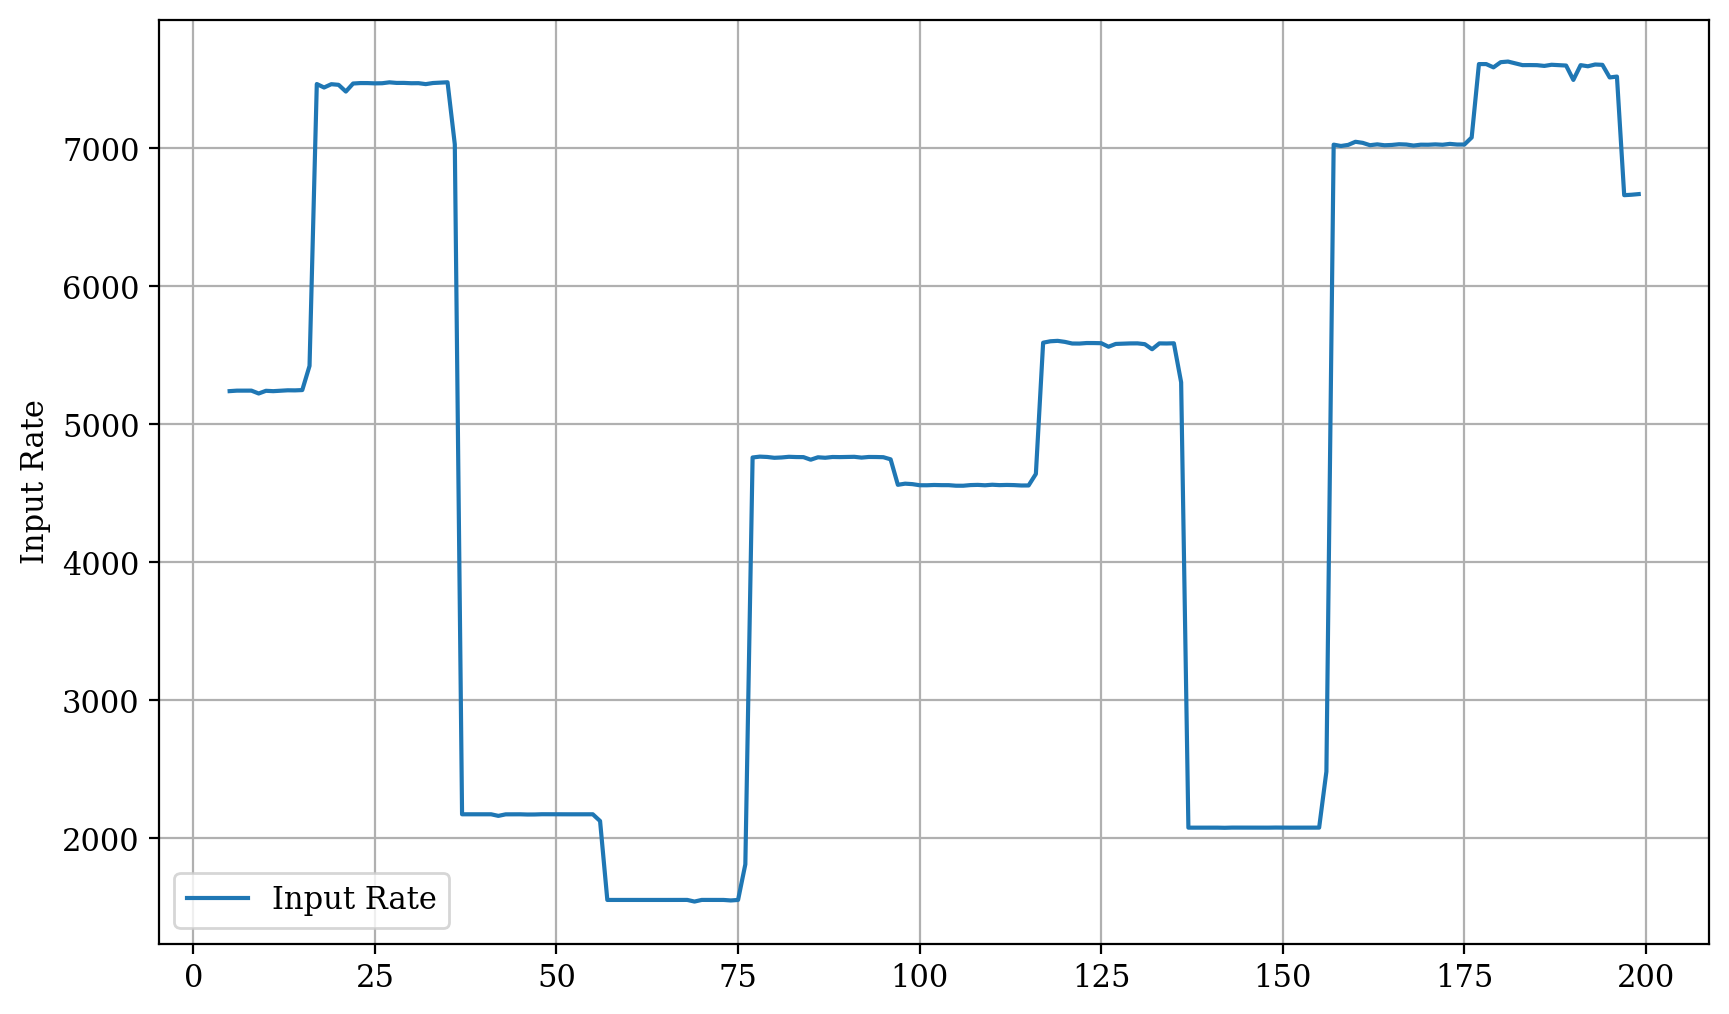

In [47]:
plt.figure(figsize=(10, 6)) 
plt.plot(df['input_rate'][5:200], label='Input Rate')
#plt.plot(df['output_rate'][5::], label='Input Rate')
plt.ylabel('Input Rate')  
plt.legend() 
plt.grid(True)
plt.show() 

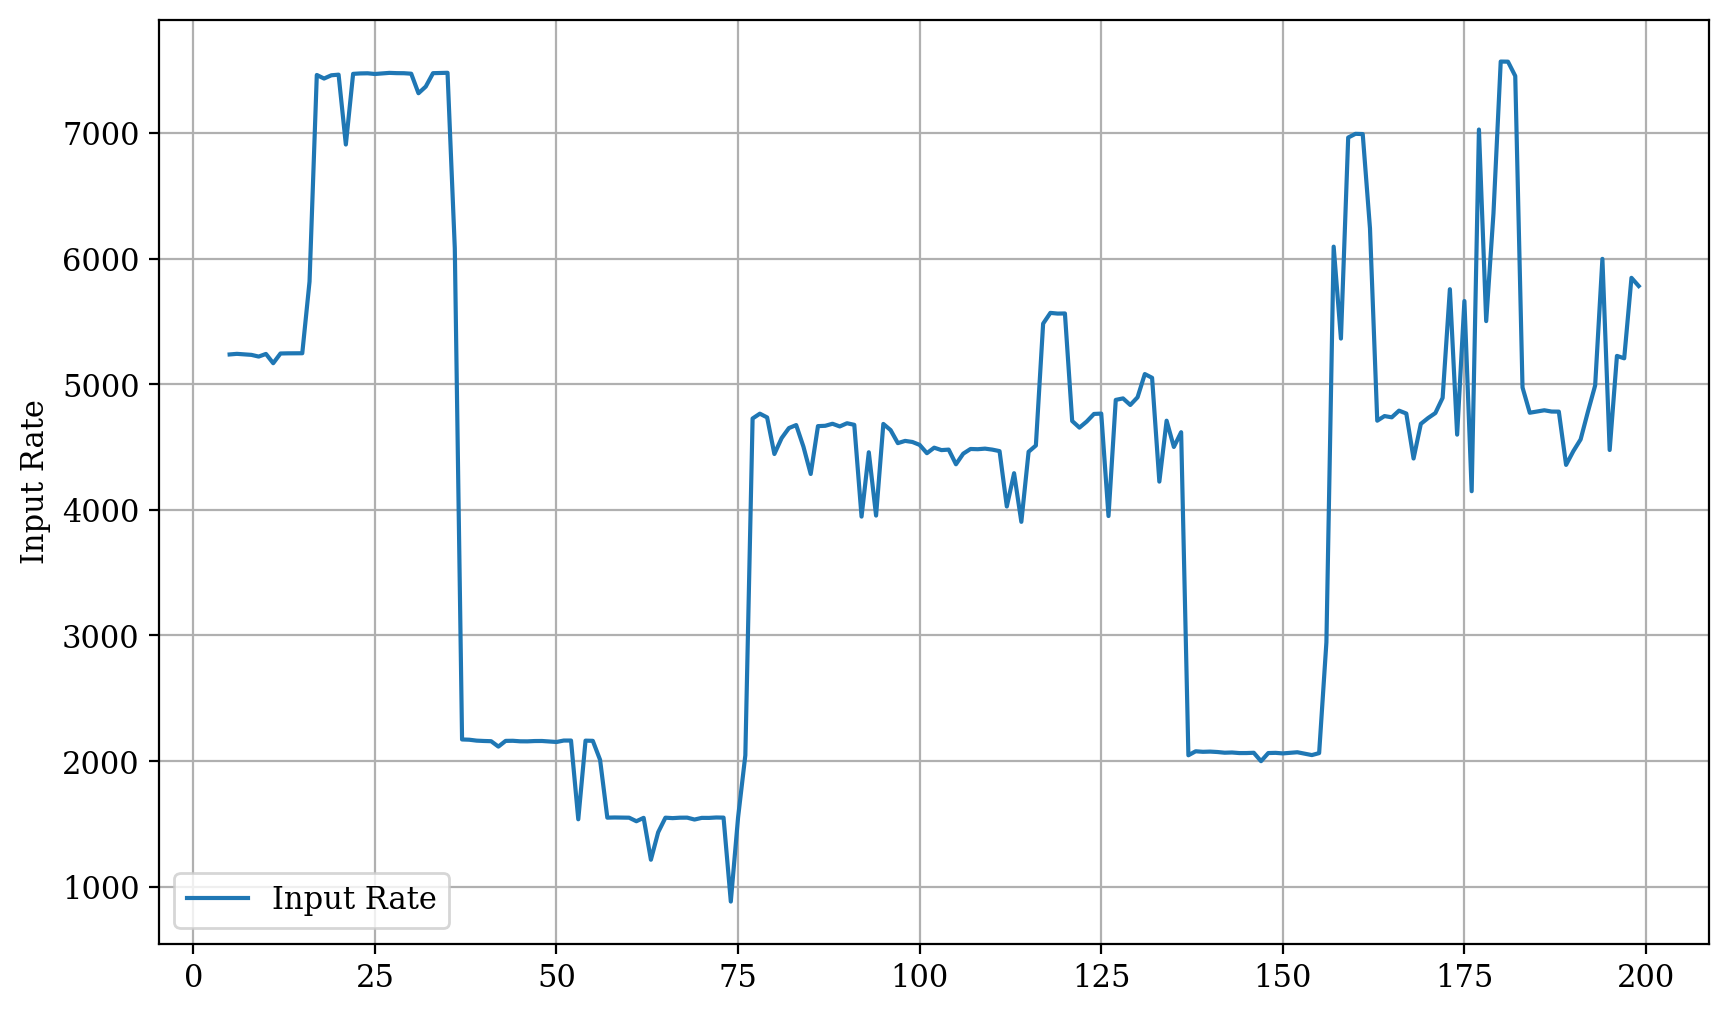

In [48]:
plt.figure(figsize=(10, 6)) 
plt.plot(df['output_rate'][5:200], label='Input Rate')
plt.ylabel('Input Rate')  
plt.legend() 
plt.grid(True)
plt.show() 

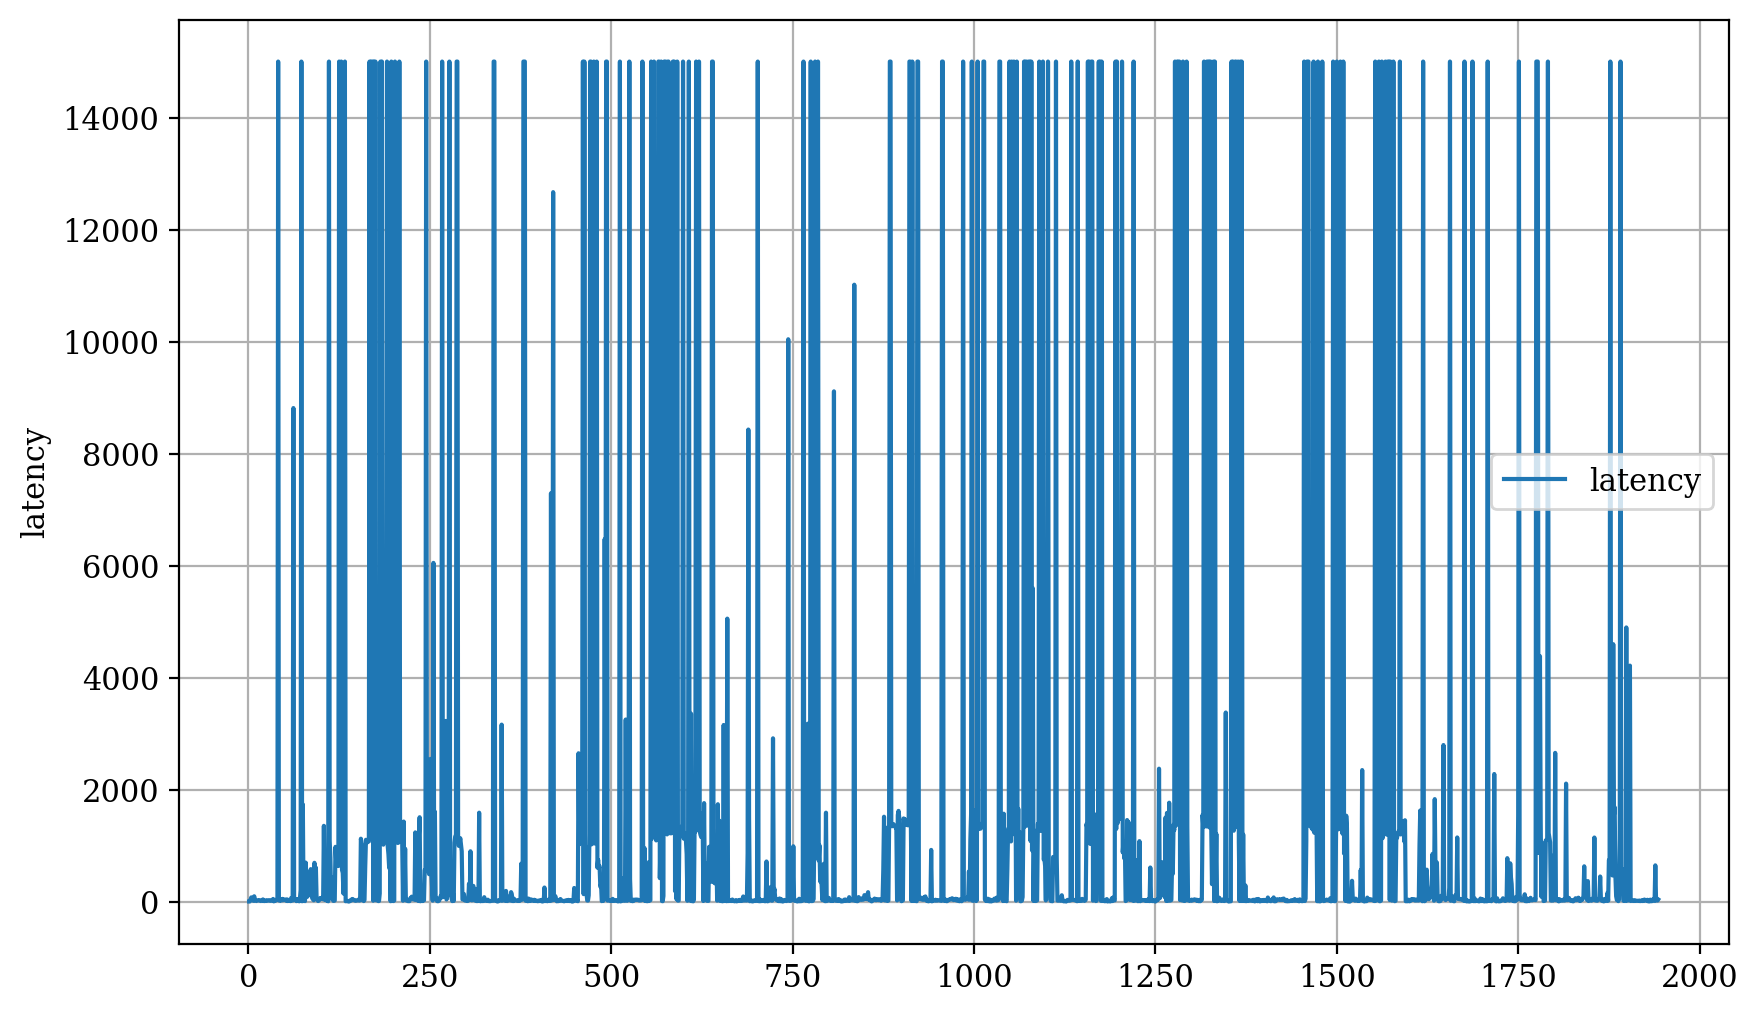

In [49]:
plt.figure(figsize=(10, 6)) 
#plt.plot(df['input_rate'][5:200], label='Input Rate')
plt.plot(df['latency'][1::], label='latency')
plt.ylabel('latency')  
plt.legend() 
plt.grid(True)
plt.show() 

In [50]:
df_subset = df.iloc[:10000]

abs_path = os.path.join("..\\datasets_pcm", "random_input_"+ exp_ls +".csv")
#df_subset.to_csv(abs_path, sep=',')


In [51]:
import pandas as pd

# 假设df是你的DataFrame

# 筛选出latency大于6000的值
condition = df["latency"] > 6000
filtered_df = df[condition]

# 计算大于6000的值的数量
count_greater_than_6000 = filtered_df.shape[0]

# 计算总数据点的数量
total_count = df.shape[0]

# 计算百分比
percentage = (count_greater_than_6000 / total_count) * 100

print(f"大于6000的数据点数量: {count_greater_than_6000}")
print(f"占总数据点的百分比: {percentage}%")


大于6000的数据点数量: 167
占总数据点的百分比: 8.590534979423868%


In [52]:
import pandas as pd

# 假设df是你的DataFrame

# 筛选出inputrate大于6000的值
condition = df["input_rate"] > 7800
filtered_df = df[condition]

# 计算大于6000的值的数量
count_greater_than_6000 = filtered_df.shape[0]

# 计算总数据点的数量
total_count = df.shape[0]

# 计算百分比
percentage = (count_greater_than_6000 / total_count) * 100

print(f"大于6000的数据点数量: {count_greater_than_6000}")
print(f"占总数据点的百分比: {percentage}%")

大于6000的数据点数量: 19
占总数据点的百分比: 0.977366255144033%
